In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib
from scipy.ndimage import gaussian_filter1d
import os

import get_model

In [2]:
path = os.getcwd()
co_path = '/'.join(path.split('/')[:-1])+'/'
plot = 0
coplus = 0

In [63]:
df = pd.read_csv(co_path+'Hoeflich_models.csv')

# Limiting to only the models that we care about for this example, i.e. what will fit reasonably well.
df = df[(df.molecule == 'CO')&(df.dataset==4)]
df

,filename,dataset,mole_frac,temperature,density,velocity,molecule
64,plot.dat_1000_4_0.0_CO,4,0.0,5000.0,1.000000e+07,1000,CO
65,plot.dat_1000_4_0.0_CO,4,0.0,5000.0,1.000000e+08,1000,CO
66,plot.dat_1000_4_0.0_CO,4,0.0,5000.0,1.000000e+09,1000,CO
67,plot.dat_1000_4_0.0_CO,4,0.0,5000.0,1.000000e+11,1000,CO
68,plot.dat_1000_4_0.0_CO,4,0.0,4000.0,1.000000e+07,1000,CO
...,...,...,...,...,...,...,...
6519,plot.dat_1250_4_5.0_CO,4,5.0,1750.0,1.000000e+11,1250,CO
6520,plot.dat_1250_4_5.0_CO,4,5.0,1500.0,1.000000e+07,1250,CO
6521,plot.dat_1250_4_5.0_CO,4,5.0,1500.0,1.000000e+08,1250,CO
6522,plot.dat_1250_4_5.0_CO,4,5.0,1500.0,1.000000e+09,1250,CO


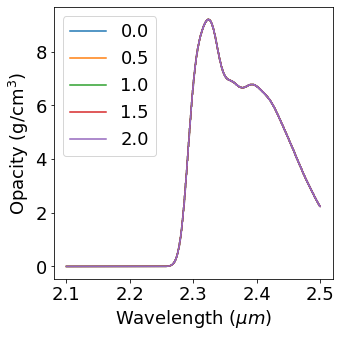

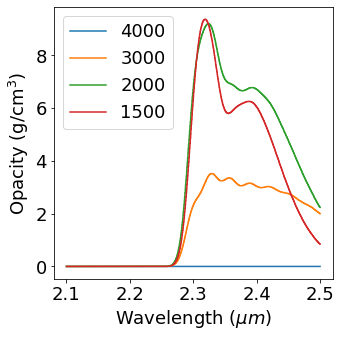

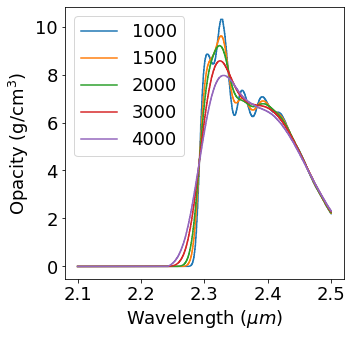

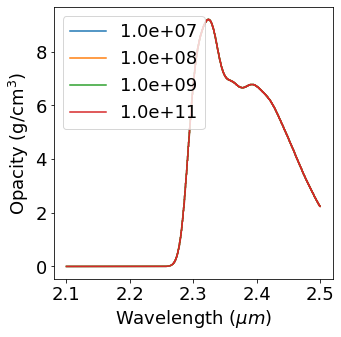

In [64]:
def plotter(df,key):
    plt.figure(figsize=(5,5))
    matplotlib.rcParams.update({'font.size': 18})
    for ind,row in df.iterrows():
        if row.mole_frac != 1.5:
            mf = format(row.mole_frac,".1f")
        else:
            mf = format(row.mole_frac,".2f")
        wav, opac = get_model.get_csv(co_path+'/models_csv/',row.temperature,
                                  row.density,row.velocity,
                                  mf,row.molecule,row.dataset)
        wav = wav/1e4
    
        w = np.where((wav>=2.1) & (wav<=2.5))
        if key == 'mole_frac':
            plt.plot(wav[w],opac[w],label=format(row[key],".1f"))
        elif key == 'temperature' or key == 'velocity':
            plt.plot(wav[w],opac[w],label=format(row[key],".0f"))
        else:
            plt.plot(wav[w],opac[w],label=format(row[key],".1e"))
        
    plt.xlabel(r'Wavelength ($\mu m$)')
    plt.ylabel(r'Opacity (g/cm$^3$)')
    plt.legend(loc=2)

    plt.savefig('/Users/sfdavis/projects/CO/'+key+'.png',dpi=300)
    plt.show()
    return

# default values
temp, dens, velo, mf = 2000, 1.0e7, 2000, 0.0

# plot changing mole_frac
tdf = df[(df.temperature==temp)&(df.density==dens)&(df.velocity==velo)]
tdf = tdf[(tdf.mole_frac==0.00)|(tdf.mole_frac==0.50)|(tdf.mole_frac==1.00)|
          (tdf.mole_frac==1.50)|(tdf.mole_frac==2.00)]
plotter(tdf,'mole_frac')

# changing temperature
tdf = df[(df.density==dens)&(df.velocity==velo)&(df.mole_frac==mf)]
tdf = tdf[(tdf.temperature==4000)|(tdf.temperature==3000)|(tdf.temperature==2000)|
          (tdf.temperature==1500)|(tdf.temperature==1000)]
plotter(tdf,'temperature')

# changing velocity
tdf = df[(df.temperature==temp)&(df.density==dens)&(df.mole_frac==mf)]
tdf = tdf[(tdf.velocity==4000)|(tdf.velocity==3000)|(tdf.velocity==2000)|(tdf.velocity==1500)|(tdf.velocity==1000)]
plotter(tdf,'velocity')

# changing density
tdf = df[(df.temperature==temp)&(df.velocity==velo)&(df.mole_frac==mf)]
tdf = tdf[(tdf.density==1.0e7)|(tdf.density==1.0e8)|(tdf.density==1.0e9)|(tdf.density==1.0e11)]
plotter(tdf,'density')